In [1]:
from firedrake import *

mesh = UnitSquareMesh(10, 10, quadrilateral=True)

(x, y) = SpatialCoordinate(mesh)
u_ex = sin(3*x) * exp(x + y)
f = -div(grad(u_ex))

V = FunctionSpace(mesh, "Lagrange", 1)

u = Function(V, name="Solution")
v = TestFunction(V)

bc = DirichletBC(V, u_ex, "on_boundary")

F = inner(grad(u), grad(v))*dx - f*v*dx

solve(F == 0, u, bc)
File("output/poisson.pvd").write(u)

print(f"||u - u_ex||_H1: {norm(u - u_ex, 'H1')}")

firedrake:WARNING OMP_NUM_THREADS is not set or is set to a value greater than 1, we suggest setting OMP_NUM_THREADS=1 to improve performance
/Users/nordin/Documents/Projects/notes_to_self/finite_element_method/firedrake/src/firedrake/firedrake/_deprecation.py:65: UserWarning: The use of `File` for output is deprecated, please update your code to use `VTKFile` from `firedrake.output`.
  warn(
tsfc:WARNING Estimated quadrature degree 14 more than tenfold greater than any argument/coefficient degree (max 1)


||u - u_ex||_H1: 0.7485377099759551


In [2]:
from firedrake import *

mesh = UnitSquareMesh(5, 5, quadrilateral=True)

(x, y) = SpatialCoordinate(mesh)
u_ex = sin(3*x) * exp(x + y)
f = -div(grad(u_ex))

p = 8
V = FunctionSpace(mesh, "Lagrange", p)
print(f"# of degrees of freedom: {V.dim()}")

u = Function(V, name="Solution")
v = TestFunction(V)

bc = DirichletBC(V, u_ex, "on_boundary")

F = inner(grad(u), grad(v))*dx - f*v*dx


sp = {
    "mat_type": "matfree",
    "ksp_type": "cg",
    "ksp_monitor": None,
    "ksp_rtol": 1.0e-14,
    "pc_type": "python",
    "pc_python_type": "firedrake.P1PC",
    "pmg_mg_coarse": {
        "pc_type": "python",
        "pc_python_type": "firedrake.AssembledPC",
        "assembled_pc_type": "cholesky",
    },
    "pmg_mg_levels": {
        "ksp_max_it": 1,
        "ksp_type": "chebyshev",
        "pc_type": "python",
        "pc_python_type": "firedrake.FDMPC",
        "fdm": {
            "pc_type": "python",
            "pc_python_type": "firedrake.ASMExtrudedStarPC",
            "pc_star_mat_ordering_type": "metisnd",
            "pc_star_sub_sub_pc_type": "cholesky",
        }
    }
}

solve(F == 0, u, bc, solver_parameters=sp)
File("output/highorder.pvd").write(u)

print(f"||u - u_ex||_H1: {norm(u - u_ex, 'H1')}")

# of degrees of freedom: 1681
    Residual norms for firedrake_1_ solve.
    0 KSP Residual norm 8.415875810162e+01
    1 KSP Residual norm 3.559123217094e+01
    2 KSP Residual norm 1.619699156880e+00
    3 KSP Residual norm 2.486192010476e-02
    4 KSP Residual norm 9.942776930407e-04
    5 KSP Residual norm 8.380624607835e-05
    6 KSP Residual norm 2.890956862383e-06
    7 KSP Residual norm 4.173555687259e-07
    8 KSP Residual norm 1.869554048166e-08
    9 KSP Residual norm 1.293203906015e-09
   10 KSP Residual norm 1.172850198609e-10
   11 KSP Residual norm 6.623180186992e-12
   12 KSP Residual norm 1.120127369827e-12
   13 KSP Residual norm 1.972964772488e-14


/Users/nordin/Documents/Projects/notes_to_self/finite_element_method/firedrake/src/firedrake/firedrake/_deprecation.py:65: UserWarning: The use of `File` for output is deprecated, please update your code to use `VTKFile` from `firedrake.output`.
  warn(


||u - u_ex||_H1: 9.105230750822905e-11


Solving on level 0


/Users/nordin/Documents/Projects/notes_to_self/finite_element_method/firedrake/src/firedrake/firedrake/_deprecation.py:65: UserWarning: The use of `File` for output is deprecated, please update your code to use `VTKFile` from `firedrake.output`.
  warn(


  ||u - u_h|| <= C x 0.27151324153546064
Solving on level 1
  ||u - u_h|| <= C x 0.254578845568901


/Users/nordin/Documents/Projects/notes_to_self/finite_element_method/firedrake/src/firedrake/firedrake/_deprecation.py:65: UserWarning: The use of `File` for output is deprecated, please update your code to use `VTKFile` from `firedrake.output`.
  warn(


Solving on level 2
  ||u - u_h|| <= C x 0.2389075628570014


/Users/nordin/Documents/Projects/notes_to_self/finite_element_method/firedrake/src/firedrake/firedrake/_deprecation.py:65: UserWarning: The use of `File` for output is deprecated, please update your code to use `VTKFile` from `firedrake.output`.
  warn(


Solving on level 3
  ||u - u_h|| <= C x 0.17289233873227566


/Users/nordin/Documents/Projects/notes_to_self/finite_element_method/firedrake/src/firedrake/firedrake/_deprecation.py:65: UserWarning: The use of `File` for output is deprecated, please update your code to use `VTKFile` from `firedrake.output`.
  warn(


Solving on level 4
  ||u - u_h|| <= C x 0.1527857030446358


/Users/nordin/Documents/Projects/notes_to_self/finite_element_method/firedrake/src/firedrake/firedrake/_deprecation.py:65: UserWarning: The use of `File` for output is deprecated, please update your code to use `VTKFile` from `firedrake.output`.
  warn(


Solving on level 5
  ||u - u_h|| <= C x 0.10496050243943236


/Users/nordin/Documents/Projects/notes_to_self/finite_element_method/firedrake/src/firedrake/firedrake/_deprecation.py:65: UserWarning: The use of `File` for output is deprecated, please update your code to use `VTKFile` from `firedrake.output`.
  warn(


Solving on level 6
  ||u - u_h|| <= C x 0.08580788110648073


/Users/nordin/Documents/Projects/notes_to_self/finite_element_method/firedrake/src/firedrake/firedrake/_deprecation.py:65: UserWarning: The use of `File` for output is deprecated, please update your code to use `VTKFile` from `firedrake.output`.
  warn(


Solving on level 7
  ||u - u_h|| <= C x 0.07412241178752008


/Users/nordin/Documents/Projects/notes_to_self/finite_element_method/firedrake/src/firedrake/firedrake/_deprecation.py:65: UserWarning: The use of `File` for output is deprecated, please update your code to use `VTKFile` from `firedrake.output`.
  warn(


Solving on level 8


/Users/nordin/Documents/Projects/notes_to_self/finite_element_method/firedrake/src/firedrake/firedrake/_deprecation.py:65: UserWarning: The use of `File` for output is deprecated, please update your code to use `VTKFile` from `firedrake.output`.
  warn(


  ||u - u_h|| <= C x 0.05512090561739006
Solving on level 9


/Users/nordin/Documents/Projects/notes_to_self/finite_element_method/firedrake/src/firedrake/firedrake/_deprecation.py:65: UserWarning: The use of `File` for output is deprecated, please update your code to use `VTKFile` from `firedrake.output`.
  warn(


  ||u - u_h|| <= C x 0.04361195197168904


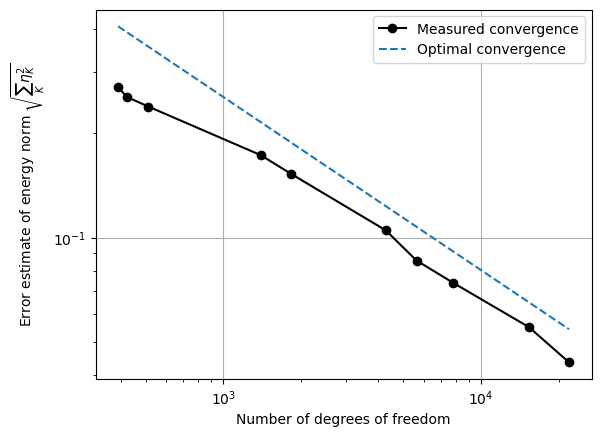

In [3]:
from firedrake import *
from netgen.occ import *

def solve_poisson(mesh):
    V = FunctionSpace(mesh, "CG", 1)
    uh = Function(V, name="Solution")
    v = TestFunction(V)
    bc = DirichletBC(V, 0, "on_boundary")
    f = Constant(1)
    F = inner(grad(uh), grad(v))*dx - inner(f, v)*dx
    solve(F == 0, uh, bc)
    return uh


def estimate_error(mesh, uh):
    W = FunctionSpace(mesh, "DG", 0)
    eta_sq = Function(W)
    w = TestFunction(W)
    f = Constant(1)
    h = CellDiameter(mesh)  # symbols for mesh quantities
    n = FacetNormal(mesh)
    v = CellVolume(mesh)

    G = (  # compute cellwise error estimator
          inner(eta_sq / v, w)*dx
        - inner(h**2 * (f + div(grad(uh)))**2, w) * dx
        - inner(h('+')/2 * jump(grad(uh), n)**2, w('+')) * dS
        - inner(h('-')/2 * jump(grad(uh), n)**2, w('-')) * dS
        )

    # Each cell is an independent 1x1 solve, so Jacobi is exact
    sp = {"mat_type": "matfree", "ksp_type": "richardson", "pc_type": "jacobi"}
    solve(G == 0, eta_sq, solver_parameters=sp)
    eta = Function(W).interpolate(sqrt(eta_sq))  # compute eta from eta^2

    with eta.dat.vec_ro as eta_:  # compute estimate for error in energy norm
        error_est = sqrt(eta_.dot(eta_))
    return (eta, error_est)


def adapt(mesh, eta):
    W = FunctionSpace(mesh, "DG", 0)
    markers = Function(W)

    # We decide to refine an element if its error indicator
    # is within a fraction of the maximum cellwise error indicator

    # Access storage underlying our Function
    # (a PETSc Vec) to get maximum value of eta
    with eta.dat.vec_ro as eta_:
        eta_max = eta_.max()[1]

    theta = 0.5
    should_refine = conditional(gt(eta, theta*eta_max), 1, 0)
    markers.interpolate(should_refine)

    refined_mesh = mesh.refine_marked_elements(markers)
    return refined_mesh


rect1 = WorkPlane(Axes((0,0,0), n=Z, h=X)).Rectangle(1,2).Face()
rect2 = WorkPlane(Axes((0,1,0), n=Z, h=X)).Rectangle(2,1).Face()
L = rect1 + rect2

geo = OCCGeometry(L, dim=2)
ngmsh = geo.GenerateMesh(maxh=0.1)
mesh = Mesh(ngmsh)

max_iterations = 10
error_estimators = []
dofs = []
for i in range(max_iterations):
    print(f"Solving on level {i}")

    uh = solve_poisson(mesh)
    File(f"output/adaptive_loop_{i}.pvd").write(uh)

    (eta, error_est) = estimate_error(mesh, uh)
    print(f"  ||u - u_h|| <= C x {error_est}")
    error_estimators.append(error_est)
    dofs.append(uh.function_space().dim())

    mesh = adapt(mesh, eta)

import matplotlib.pyplot as plt
import numpy as np

plt.grid()
plt.loglog(dofs, error_estimators, '-ok', label="Measured convergence")
scaling = 1.5 * error_estimators[0]/dofs[0]**-(0.5)
plt.loglog(dofs, np.array(dofs)**(-0.5) * scaling, '--', label="Optimal convergence")
plt.xlabel("Number of degrees of freedom")
plt.ylabel("Error estimate of energy norm $\sqrt{\sum_K \eta_K^2}$")
plt.legend()
plt.savefig("adaptive_convergence.png")
#plt.show()